# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning Lab

**Lab Title:** Yolo11 -Model-Application Name(CCTV Car-Bike Detection)

**Student Name:** Rohan Agrawal

**Student ID:** 202201040208

**Date of Submission:** 6 April 2025


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [ ]:
!nvidia-smi

Sun Apr  6 07:20:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="K3H5z59rmbmSHmWlpuLv")
project = rf.workspace("augmented-startups").project("playing-cards-ow27d")
version = project.version(4)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Playing-Cards-4 in yolov11:: 100%|██████████| 48478/48478 [00:16<00:00, 2871.24it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="K3H5z59rmbmSHmWlpuLv")
project = rf.workspace("project-tdxxb").project("cctv_car_bike_detection-fhqk8")
version = project.version(6)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cctv_car_bike_detection-6 in yolov11:: 100%|██████████| 2058/2058 [00:00<00:00, 6010.67it/s]


In [ ]:
import os
dataset_folder = dataset.location  # e.g., '/content/playing-cards-4'
zip_path = os.path.join(dataset_folder, "roboflow.zip")
extract_path = dataset_folder  # Extract in the same folder

# ✅ 1. Unzip the dataset
if os.path.exists(zip_path):
    print("📦 Extracting dataset...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Dataset extracted successfully!")

# ✅ 2. Verify dataset structure
yaml_path = os.path.join(extract_path, "data.yaml")

if os.path.exists(yaml_path):
    print("✅ data.yaml found at:", yaml_path)
else:
    print("❌ data.yaml is missing! Check extracted folder contents:", os.listdir(extract_path))


✅ data.yaml found at: /content/cctv_car_bike_detection-6/data.yaml


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/cctv_car_bike_detection-6/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

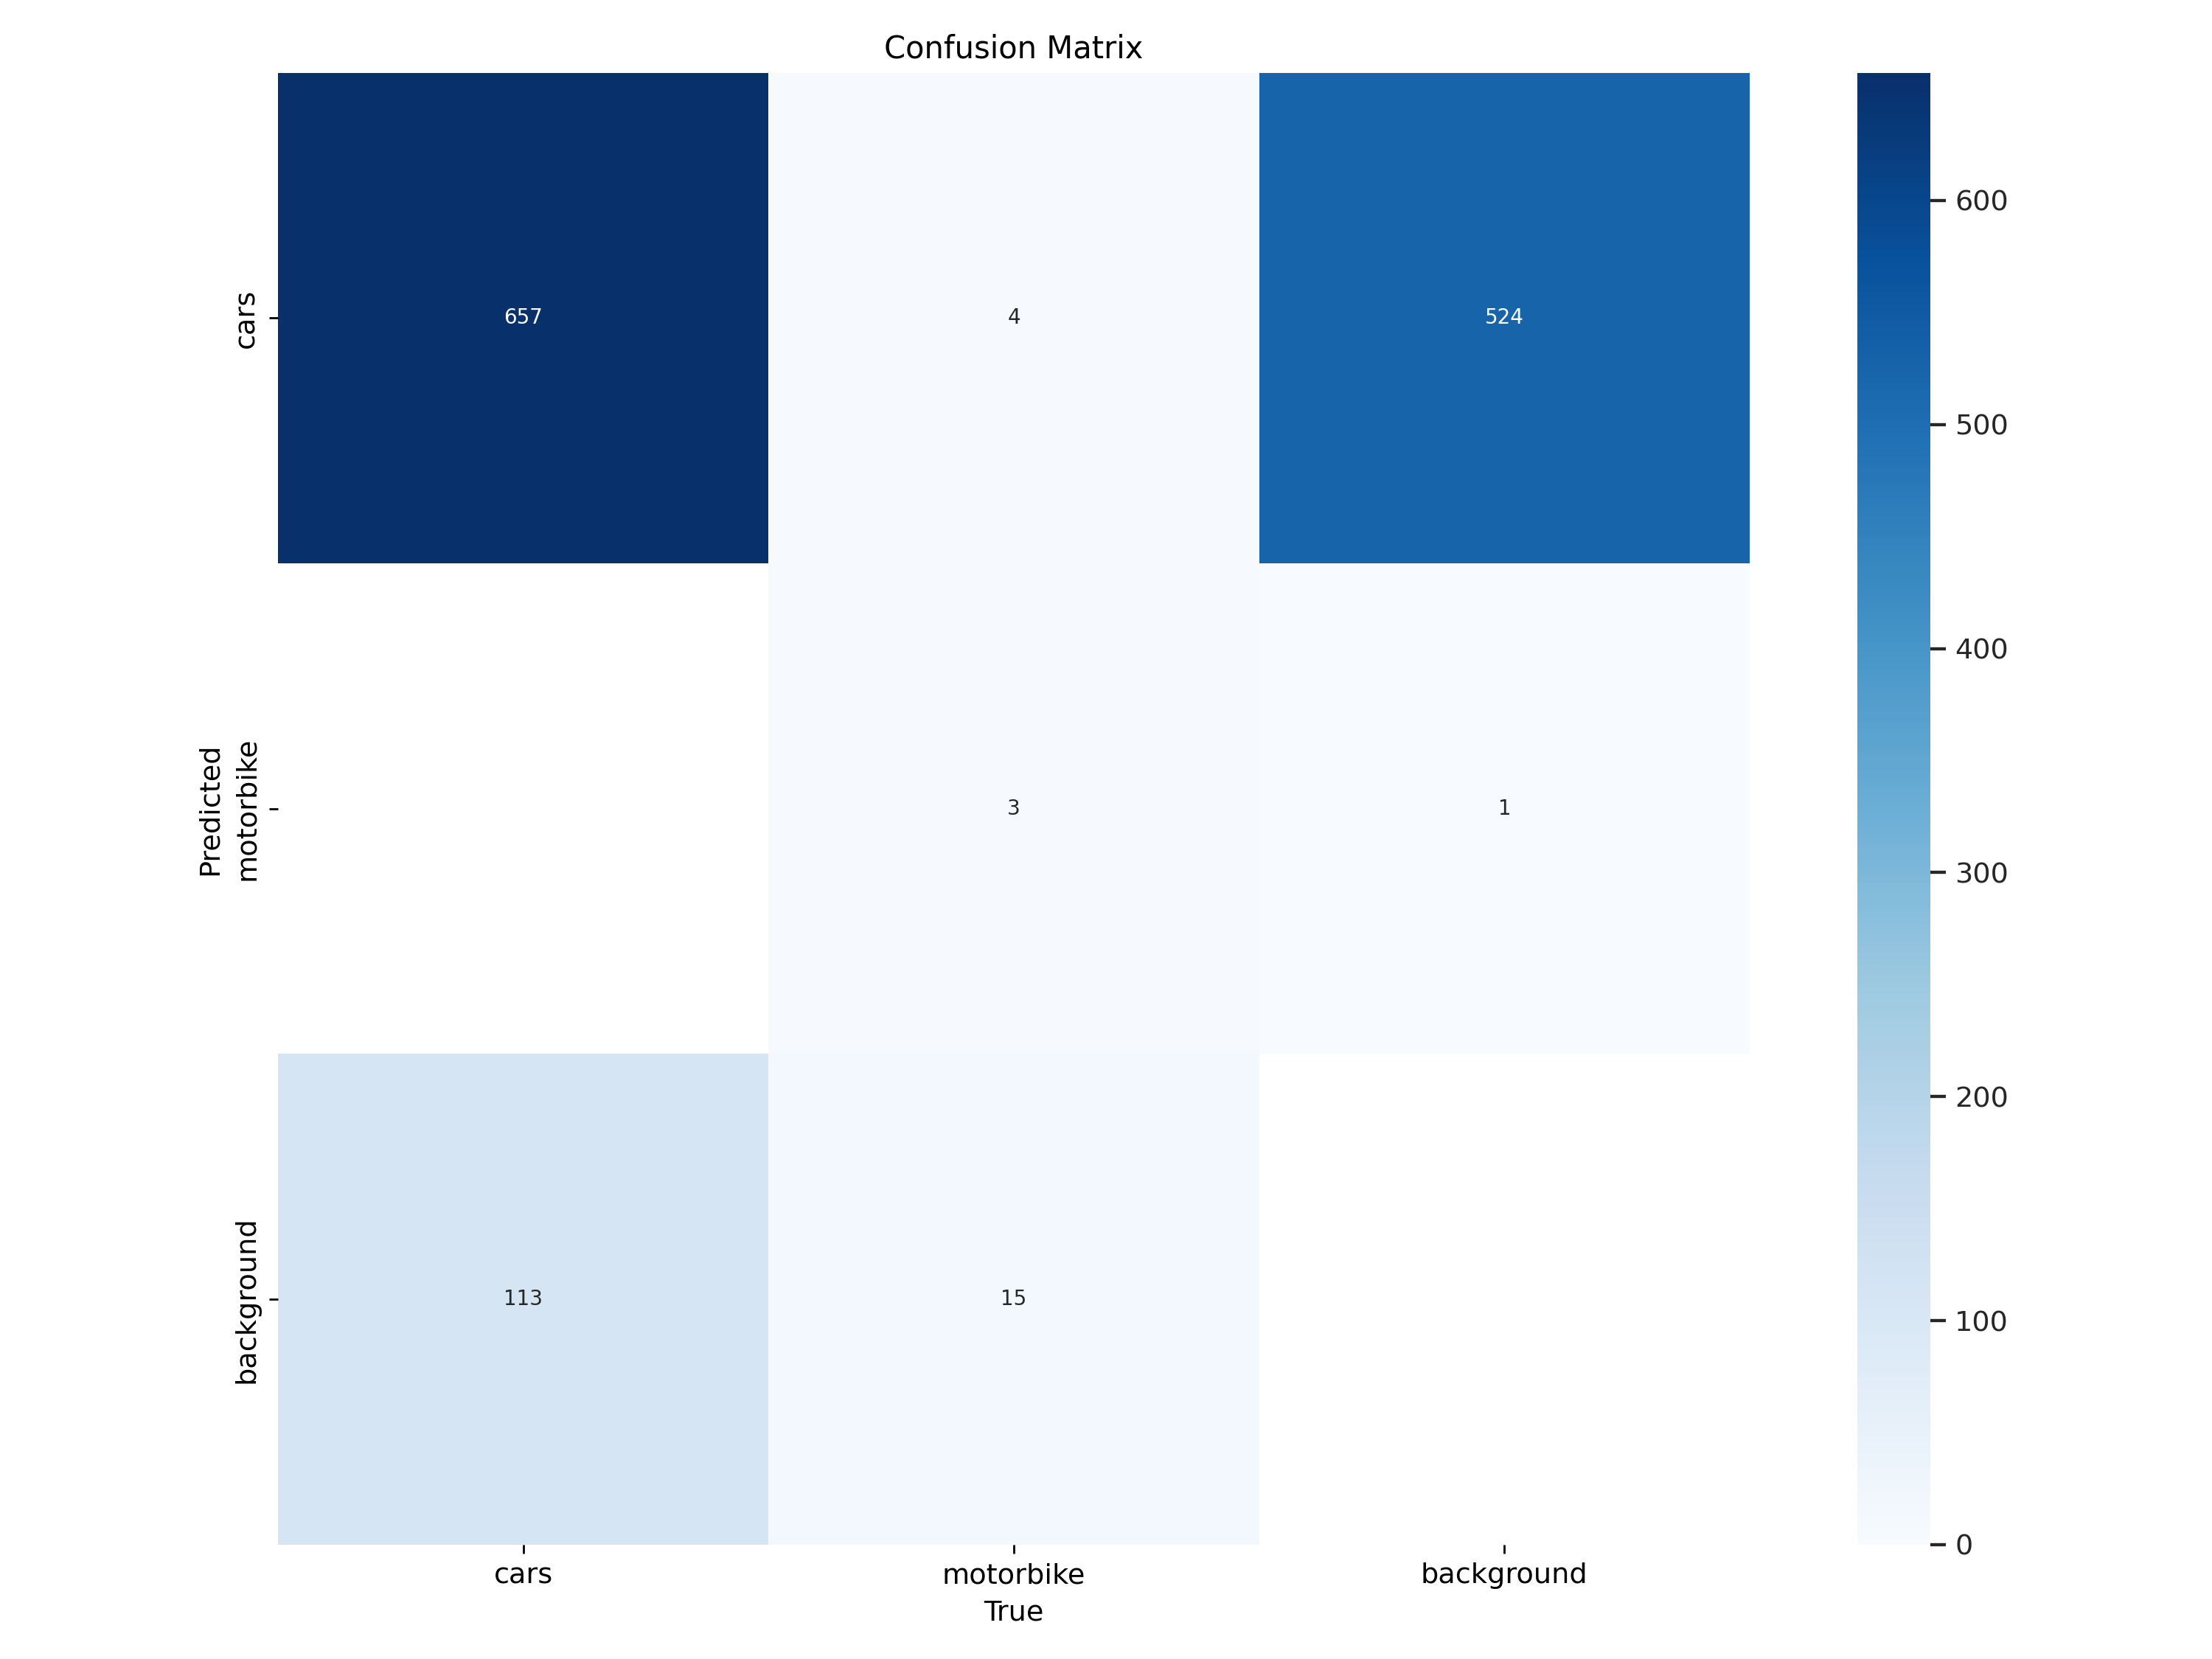

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

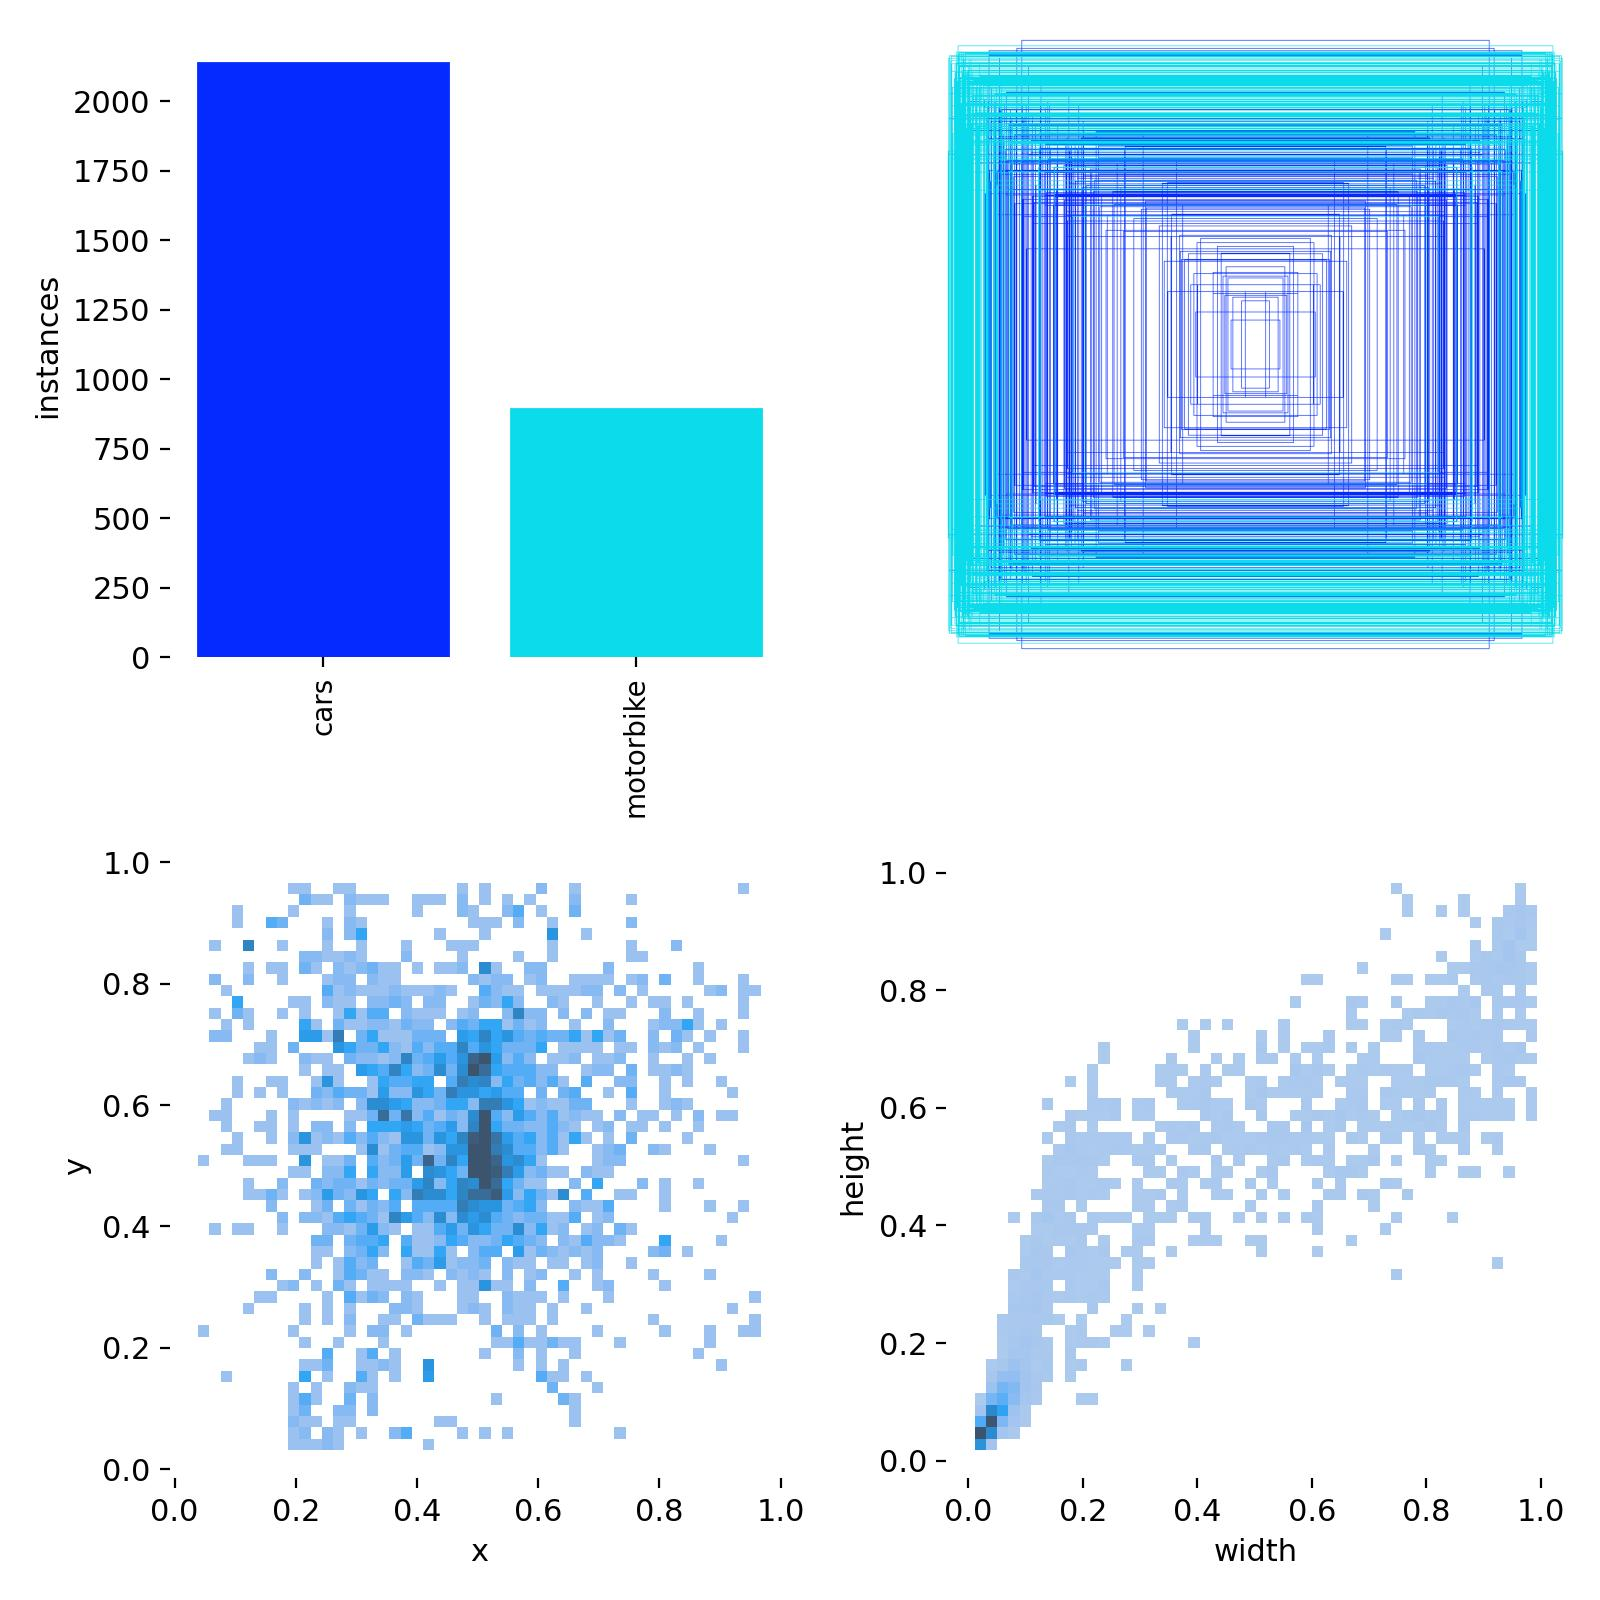

In [ ]:
Image("/content/runs/detect/train3/labels.jpg", width=600)

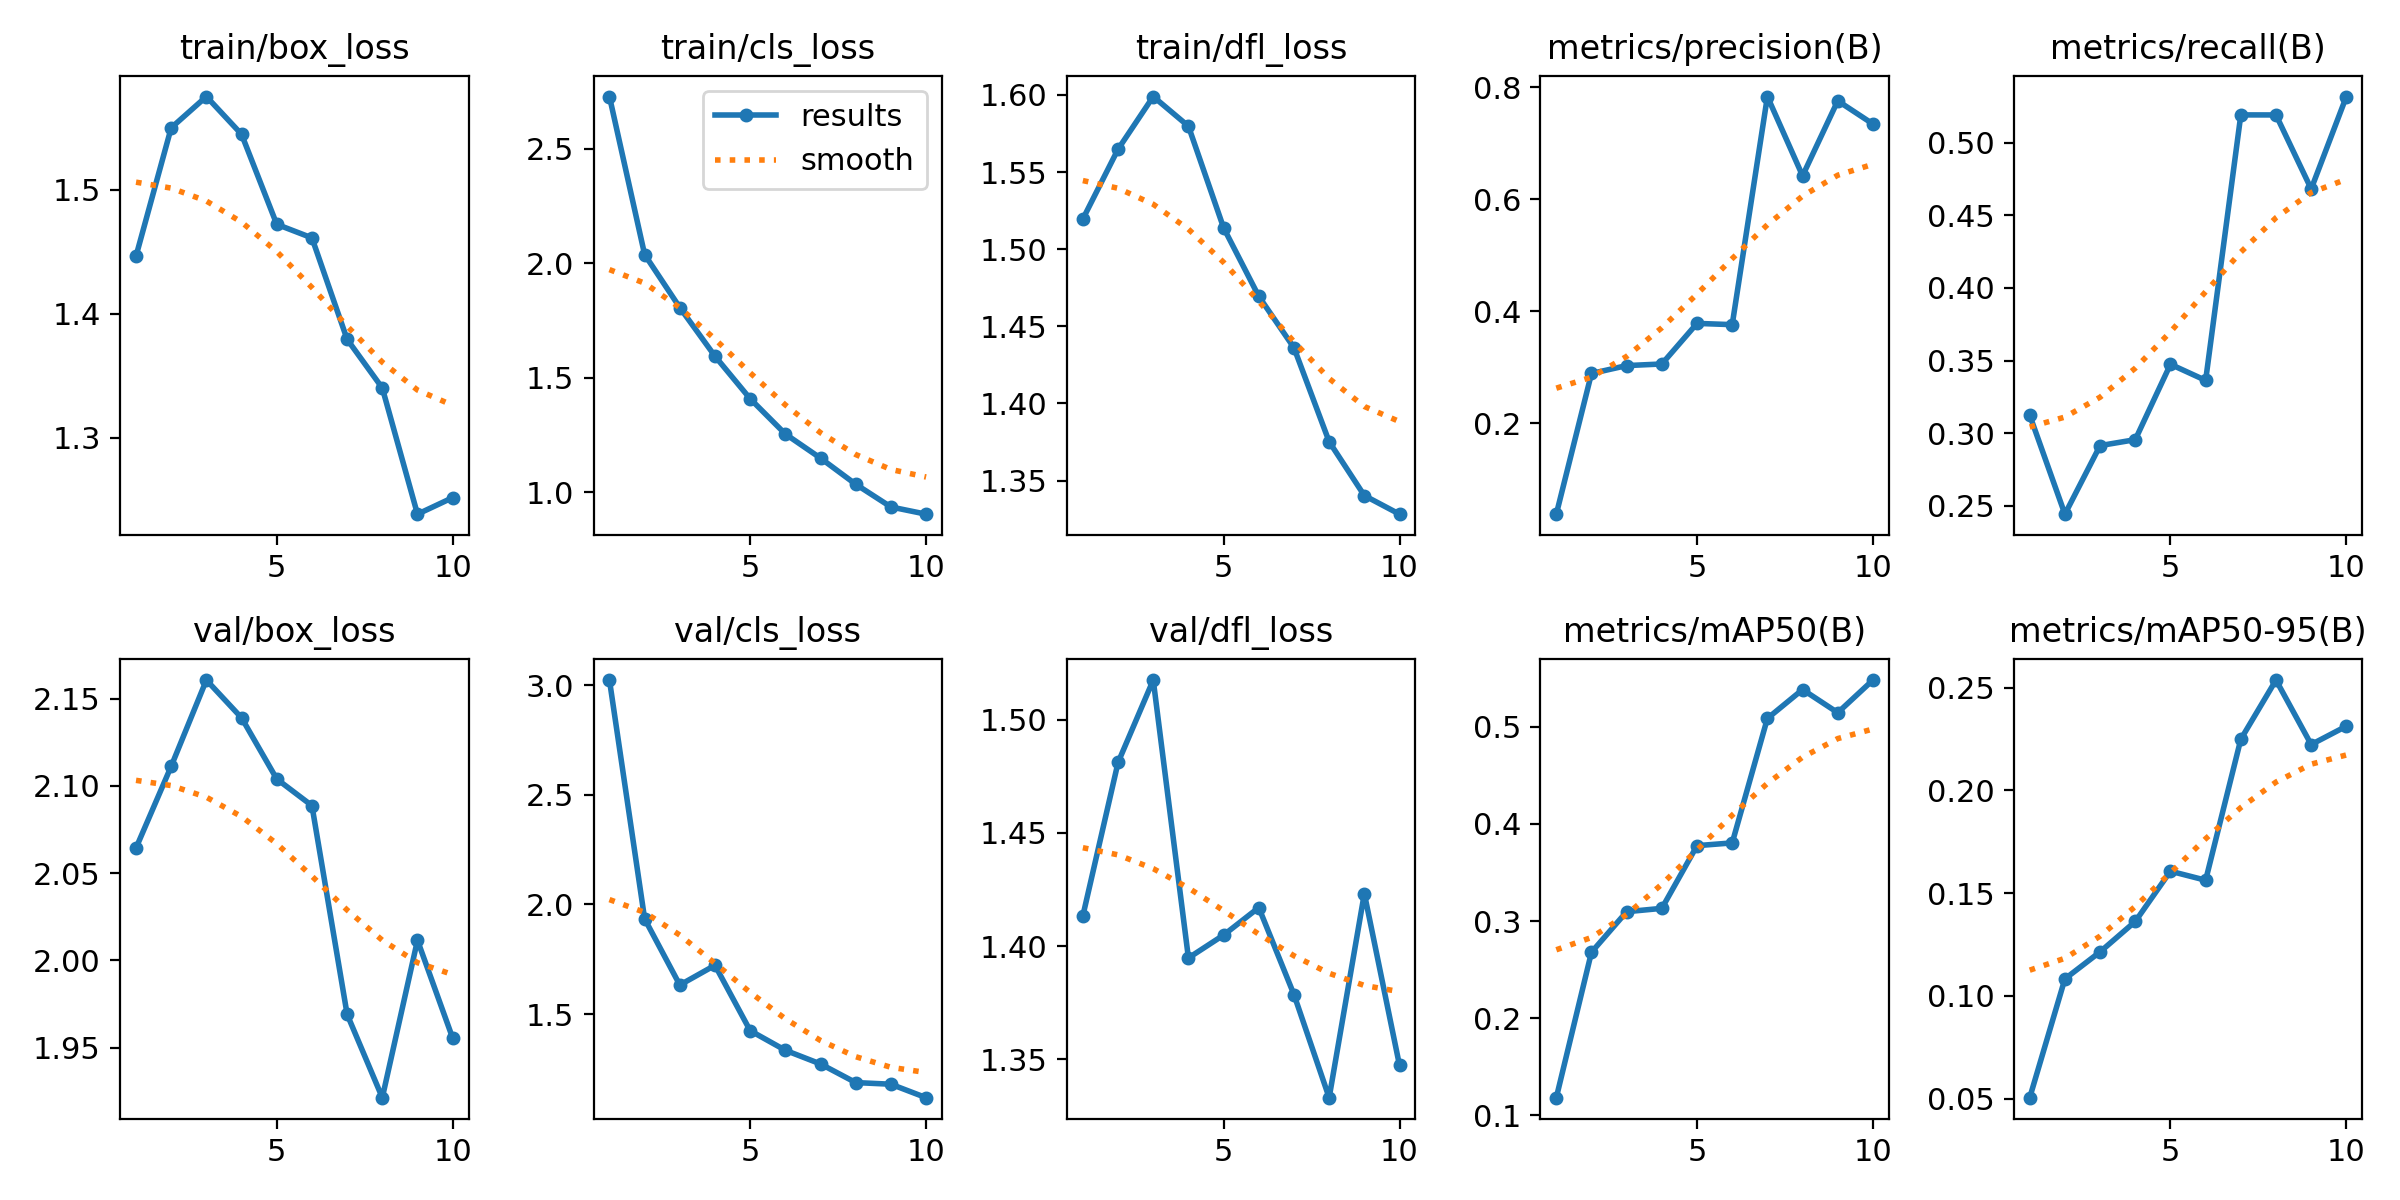

In [ ]:
Image("/content/runs/detect/train3/results.png", width=600)

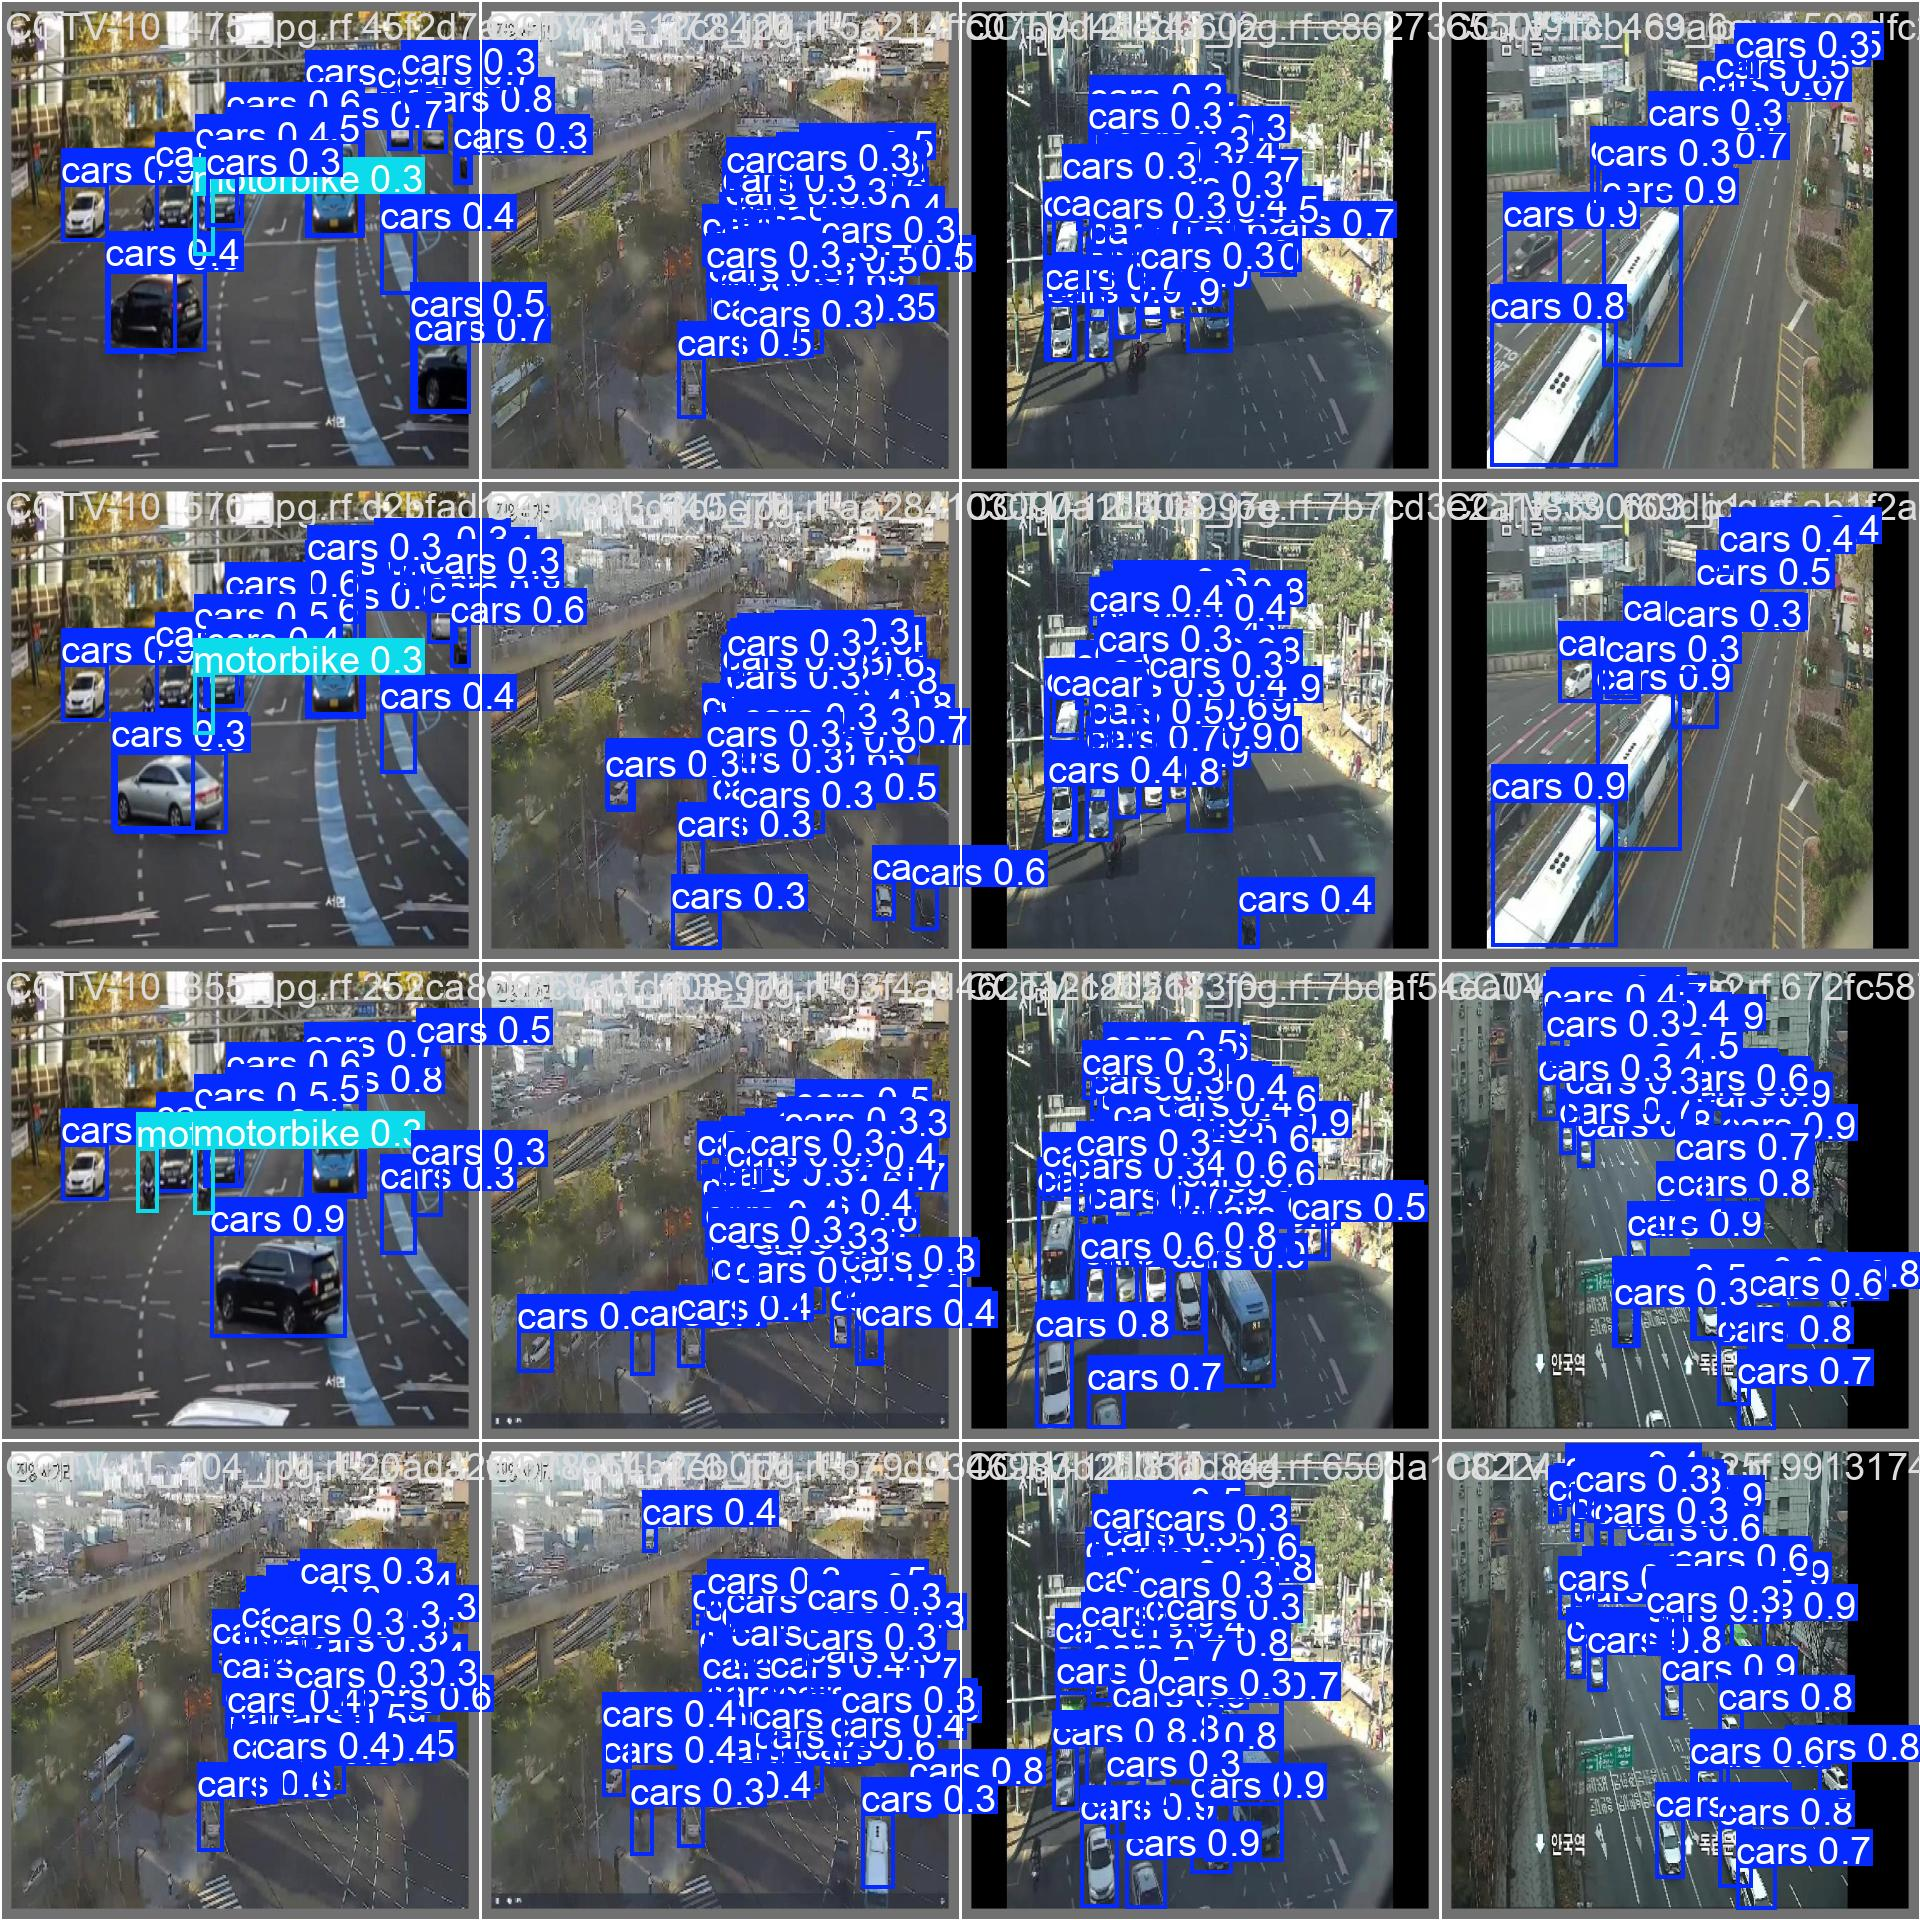

In [ ]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width=600)

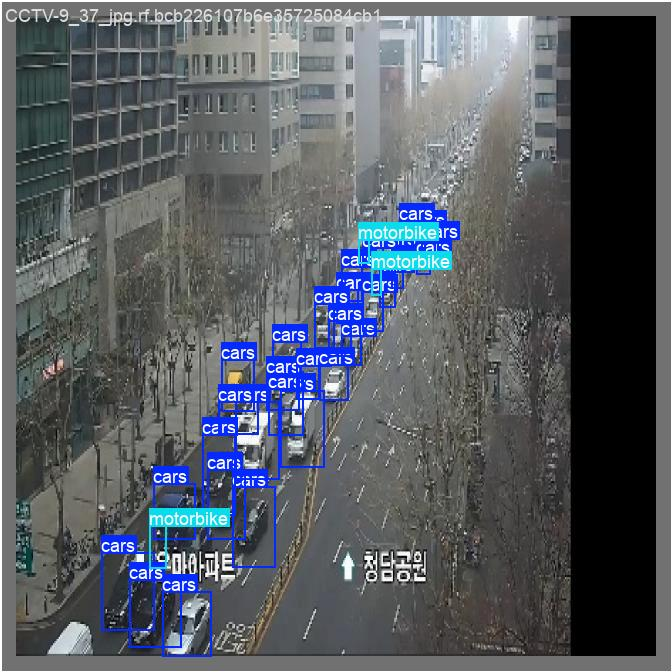

In [ ]:
Image("/content/runs/detect/train3/val_batch1_labels.jpg", width=600)


**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/cctv_car_bike_detection-6/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.36it/s]
                   all         33        792      0.643       0.52       0.54      0.251
                  cars         33        770      0.478      0.848      0.763      0.352
             motorbike         12         22      0.808      0.192      0.316       0.15
Speed: 5.1ms preprocess, 11.8ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/4 /content/cctv_car_bike_detection-6/test/images/CCTV-10_95_jpg.rf.ca27a0388b2bdb20e44f870640f2c702.jpg: 640x640 13 carss, 18.4ms
image 2/4 /content/cctv_car_bike_detection-6/test/images/CCTV-5_610_jpg.rf.5eac1e1c48c4d614529a018a71e00b75.jpg: 640x640 15 carss, 12.5ms
image 3/4 /content/cctv_car_bike_detection-6/test/images/CCTV-6_52_jpg.rf.8c1635b5aa1ef0686ef959eba0c1e026.jpg: 640x640 18 carss, 20.2ms
image 4/4 /content/cctv_car_bike_detection-6/test/images/CCTV-7_54_jpg.rf.488f5f53789b68bd76a5b41e6dad3233.jpg: 640x640 20 carss, 14.8ms
Speed: 2.9ms preprocess, 16.5ms inference, 50.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


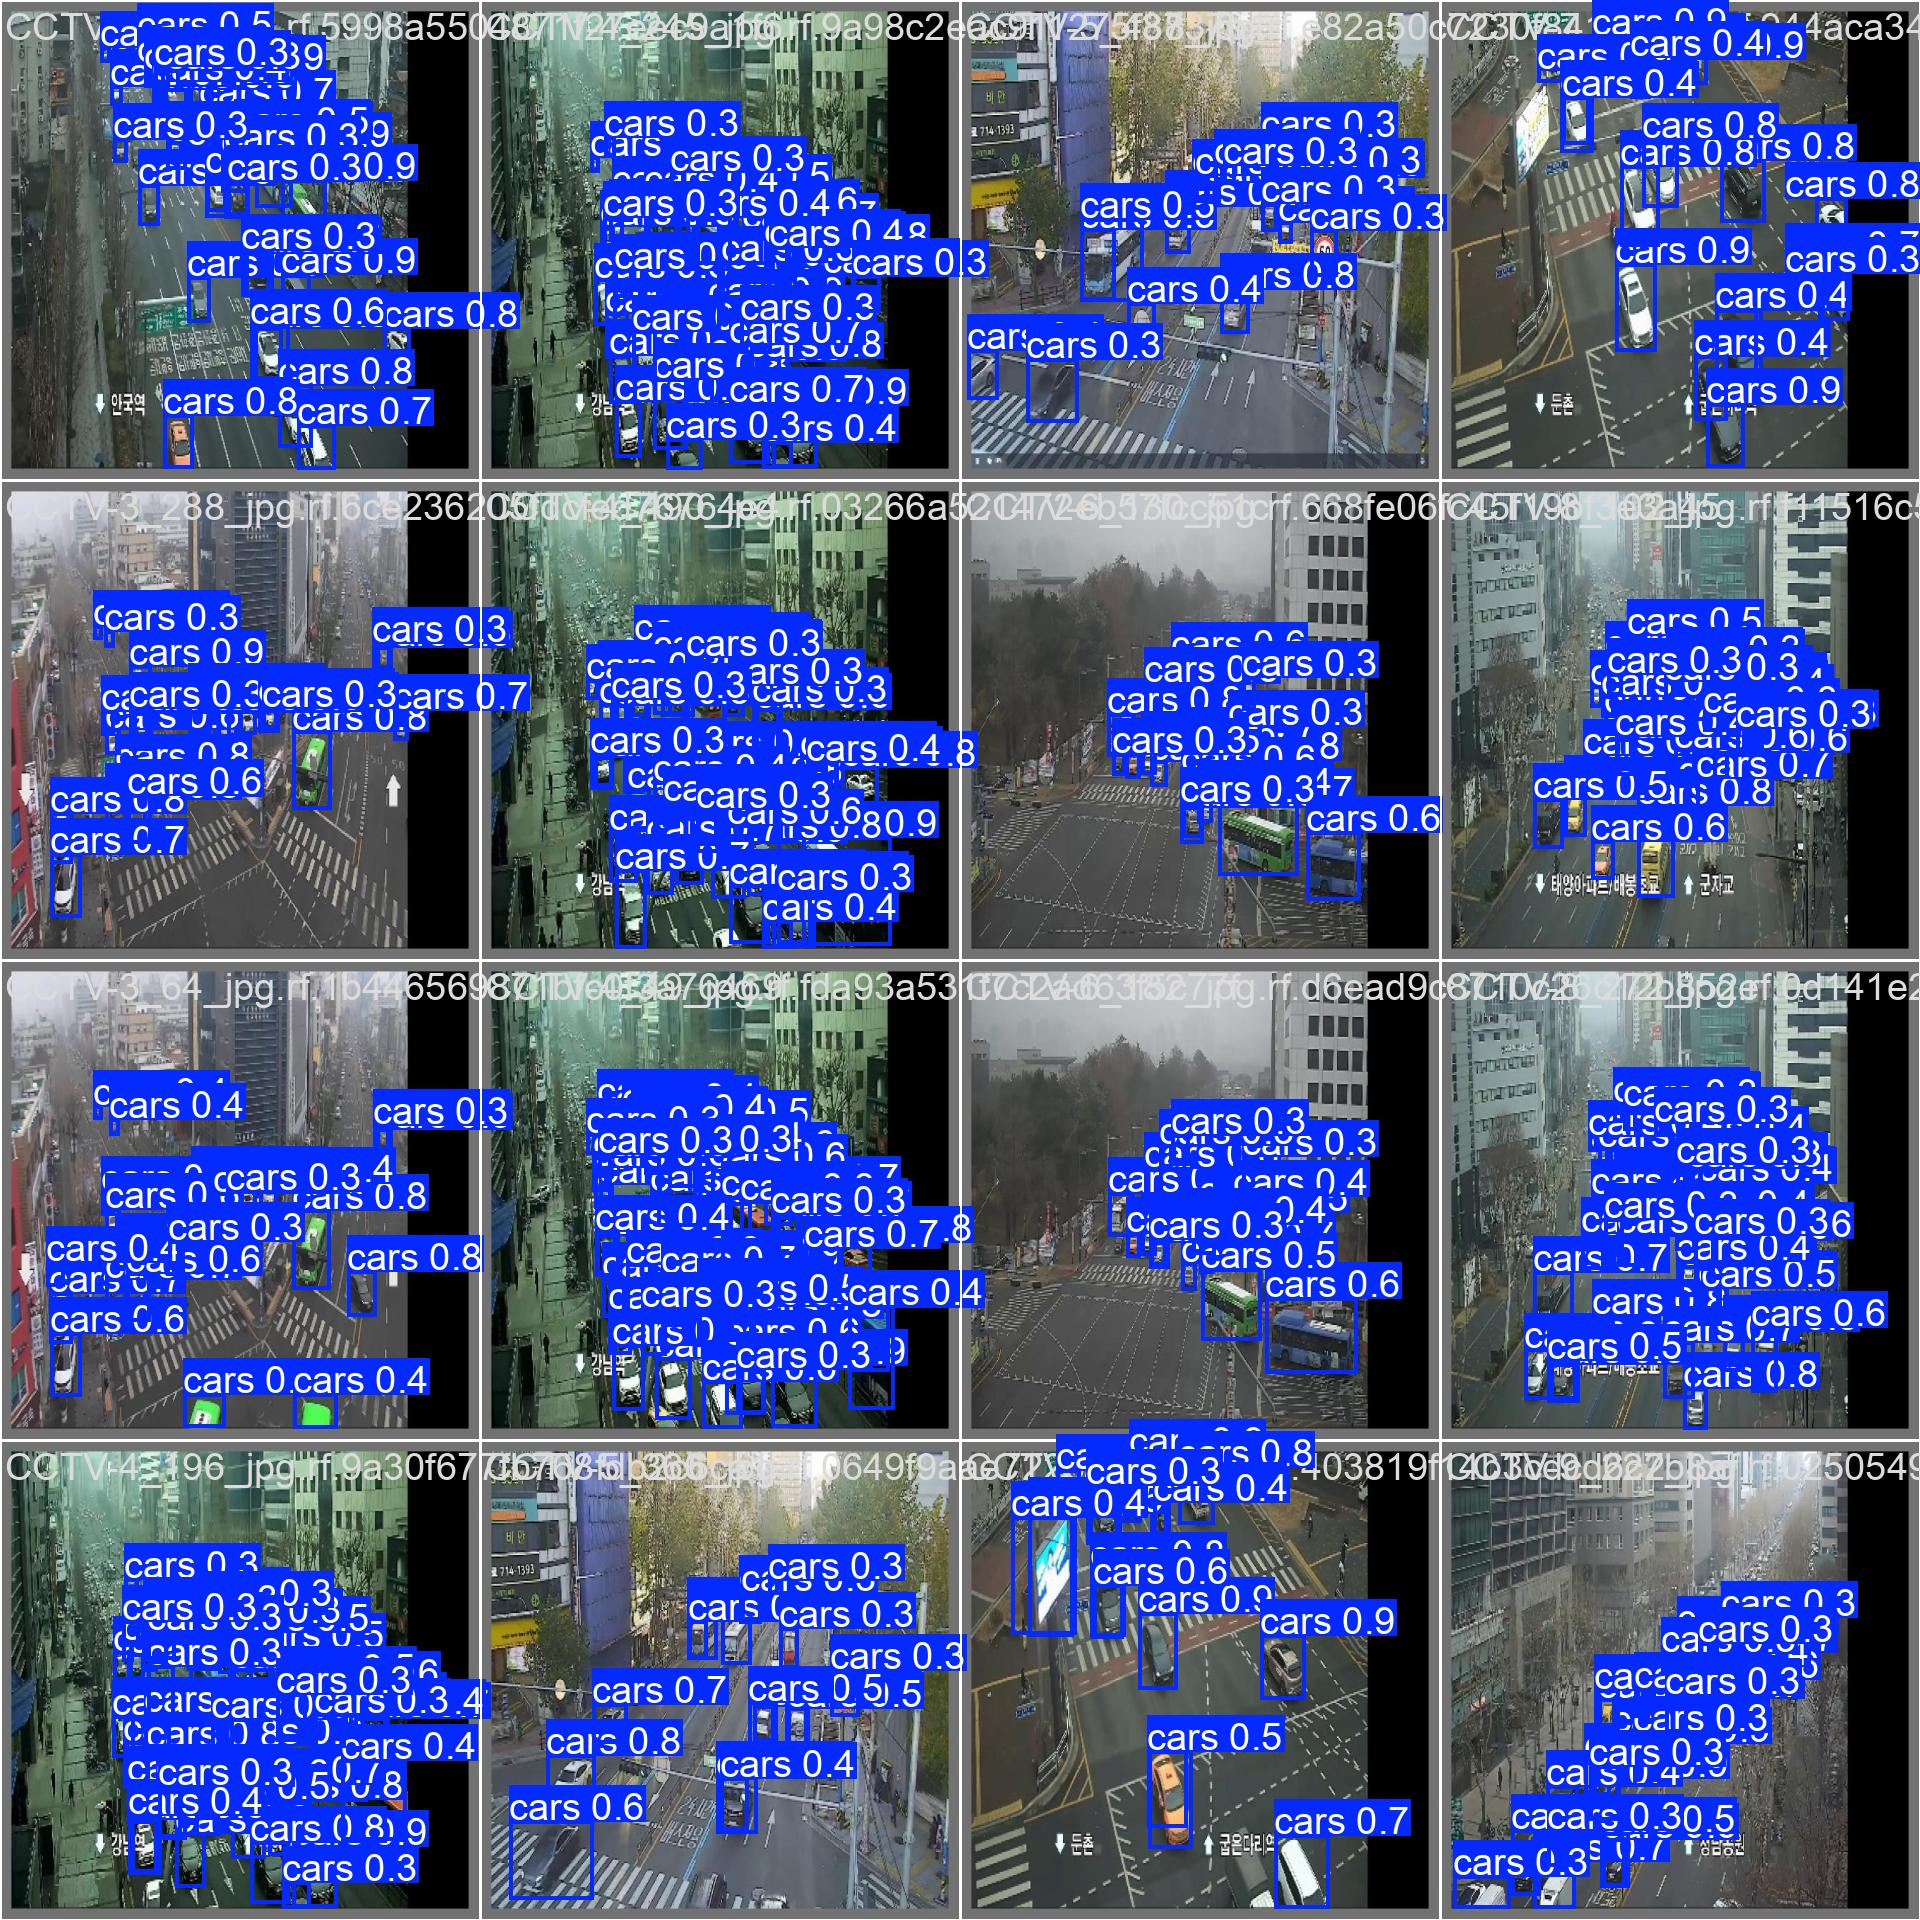

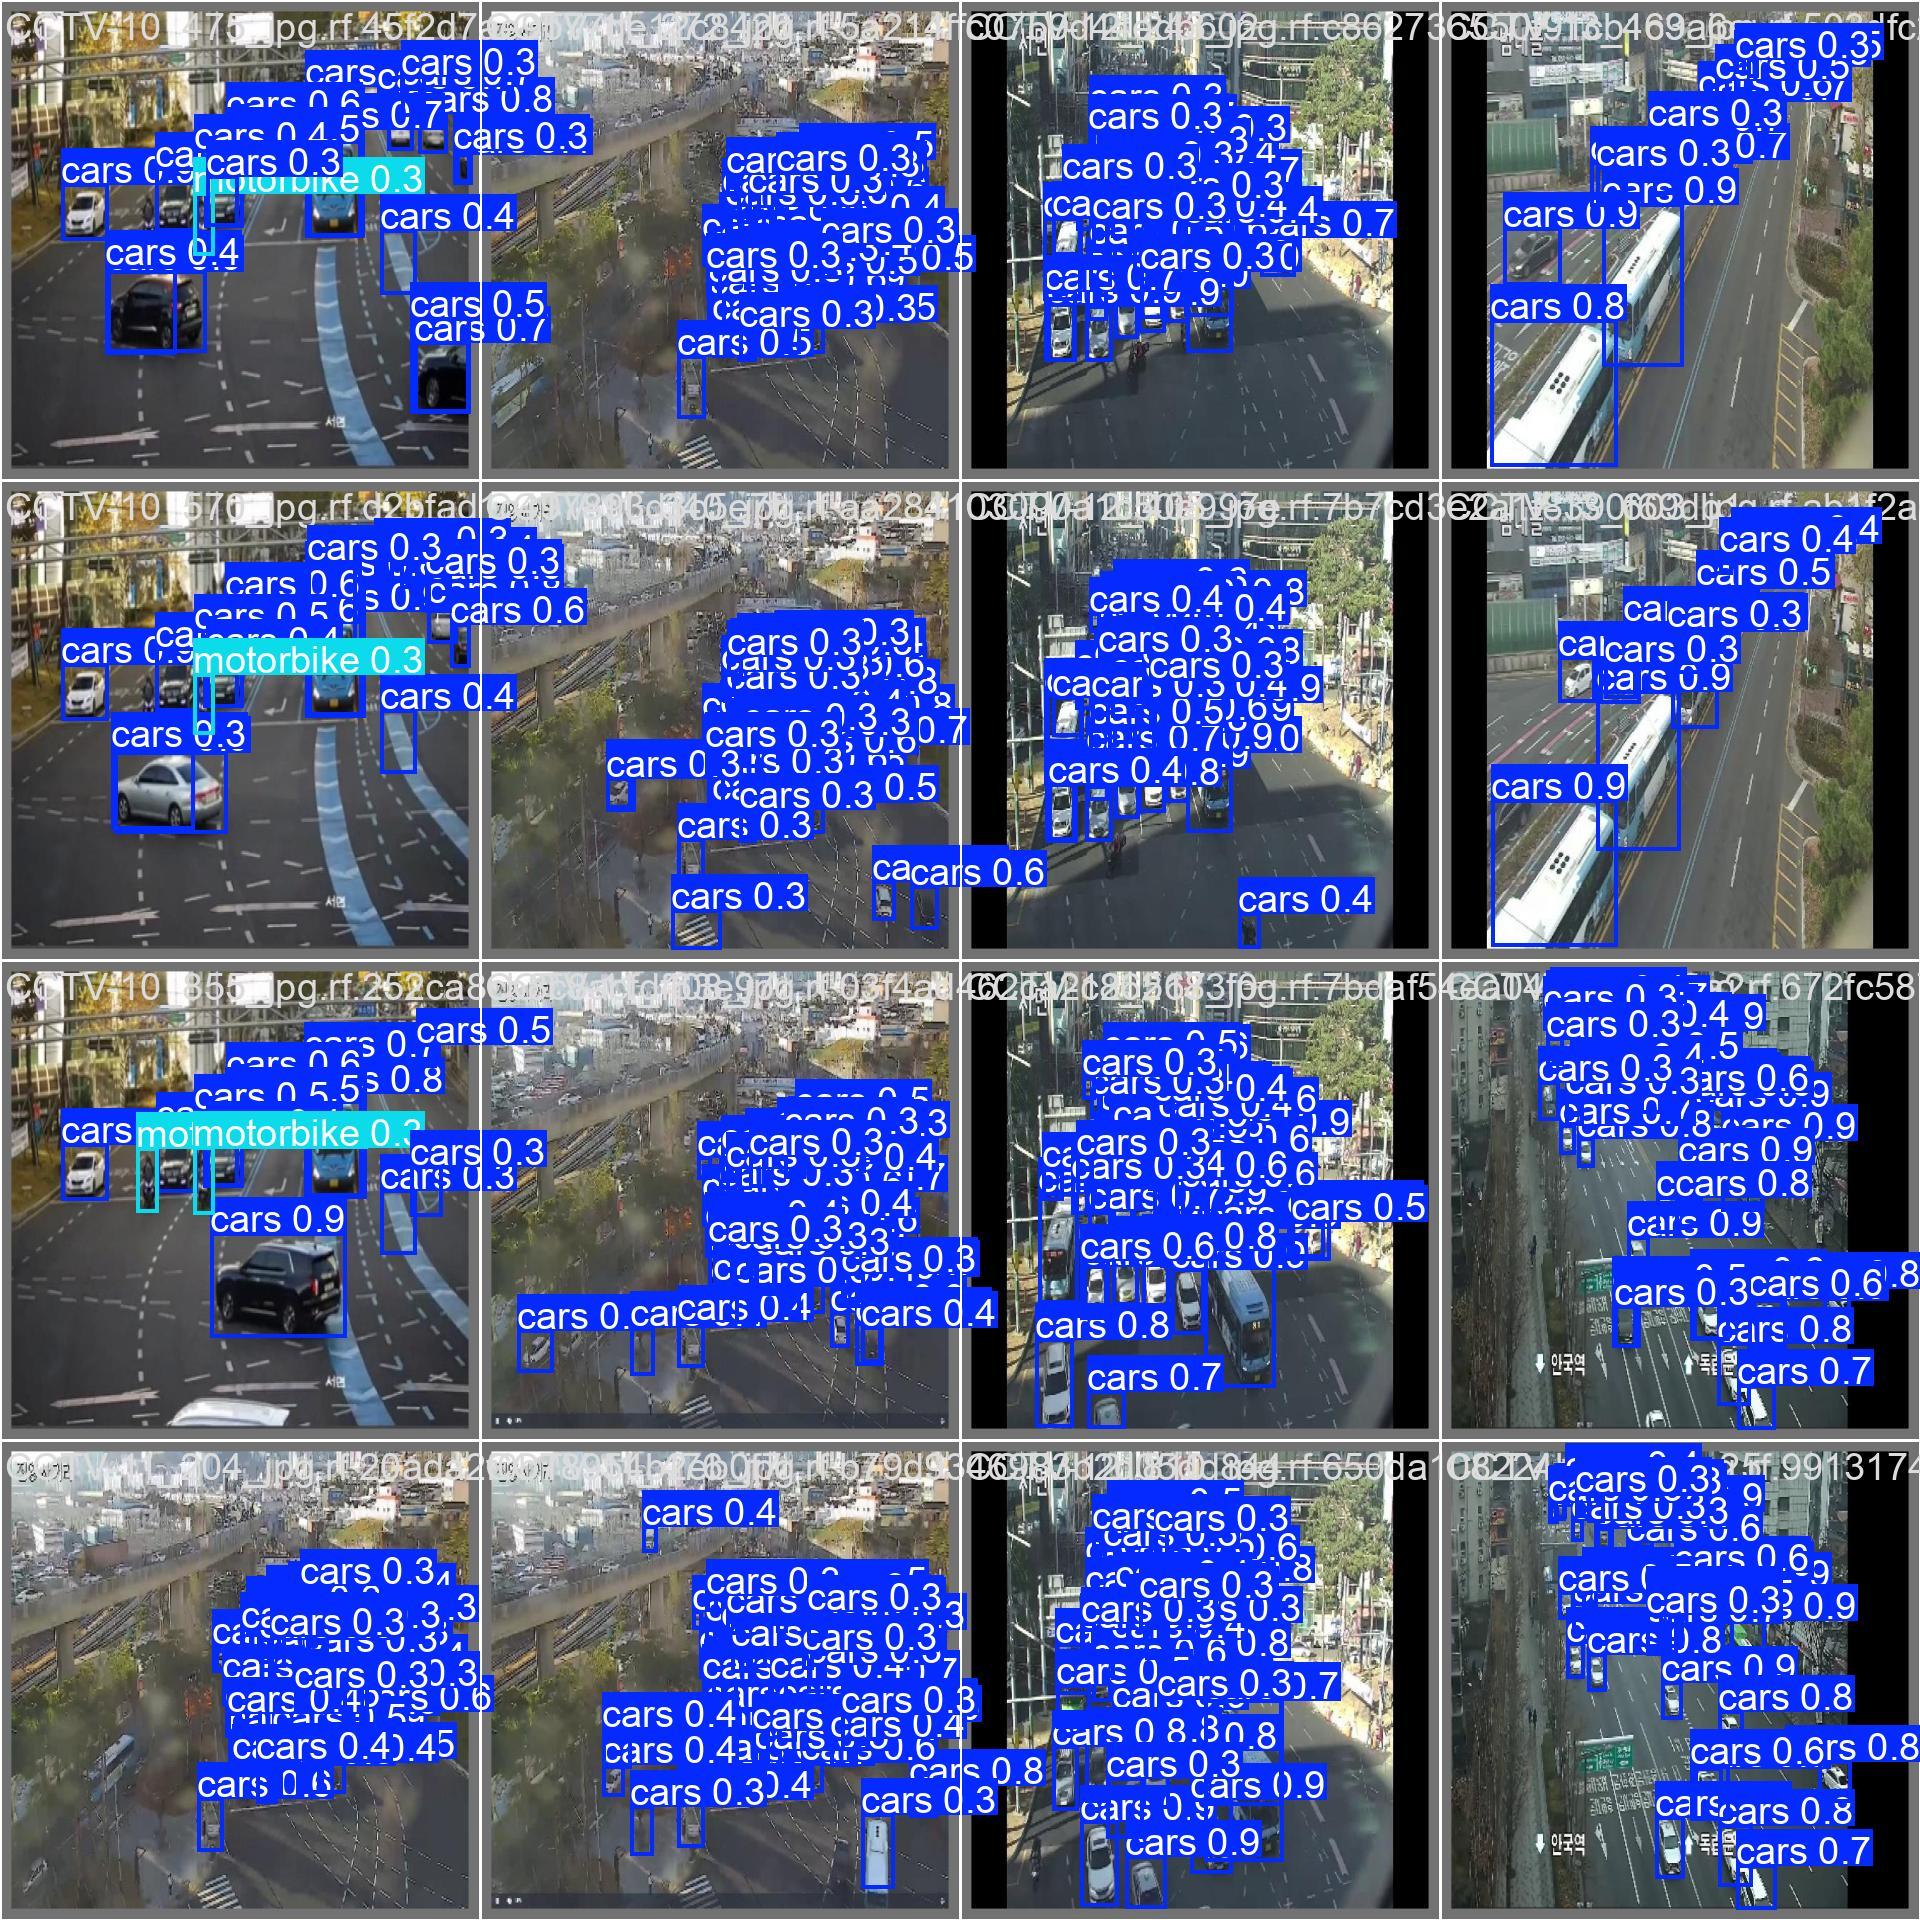

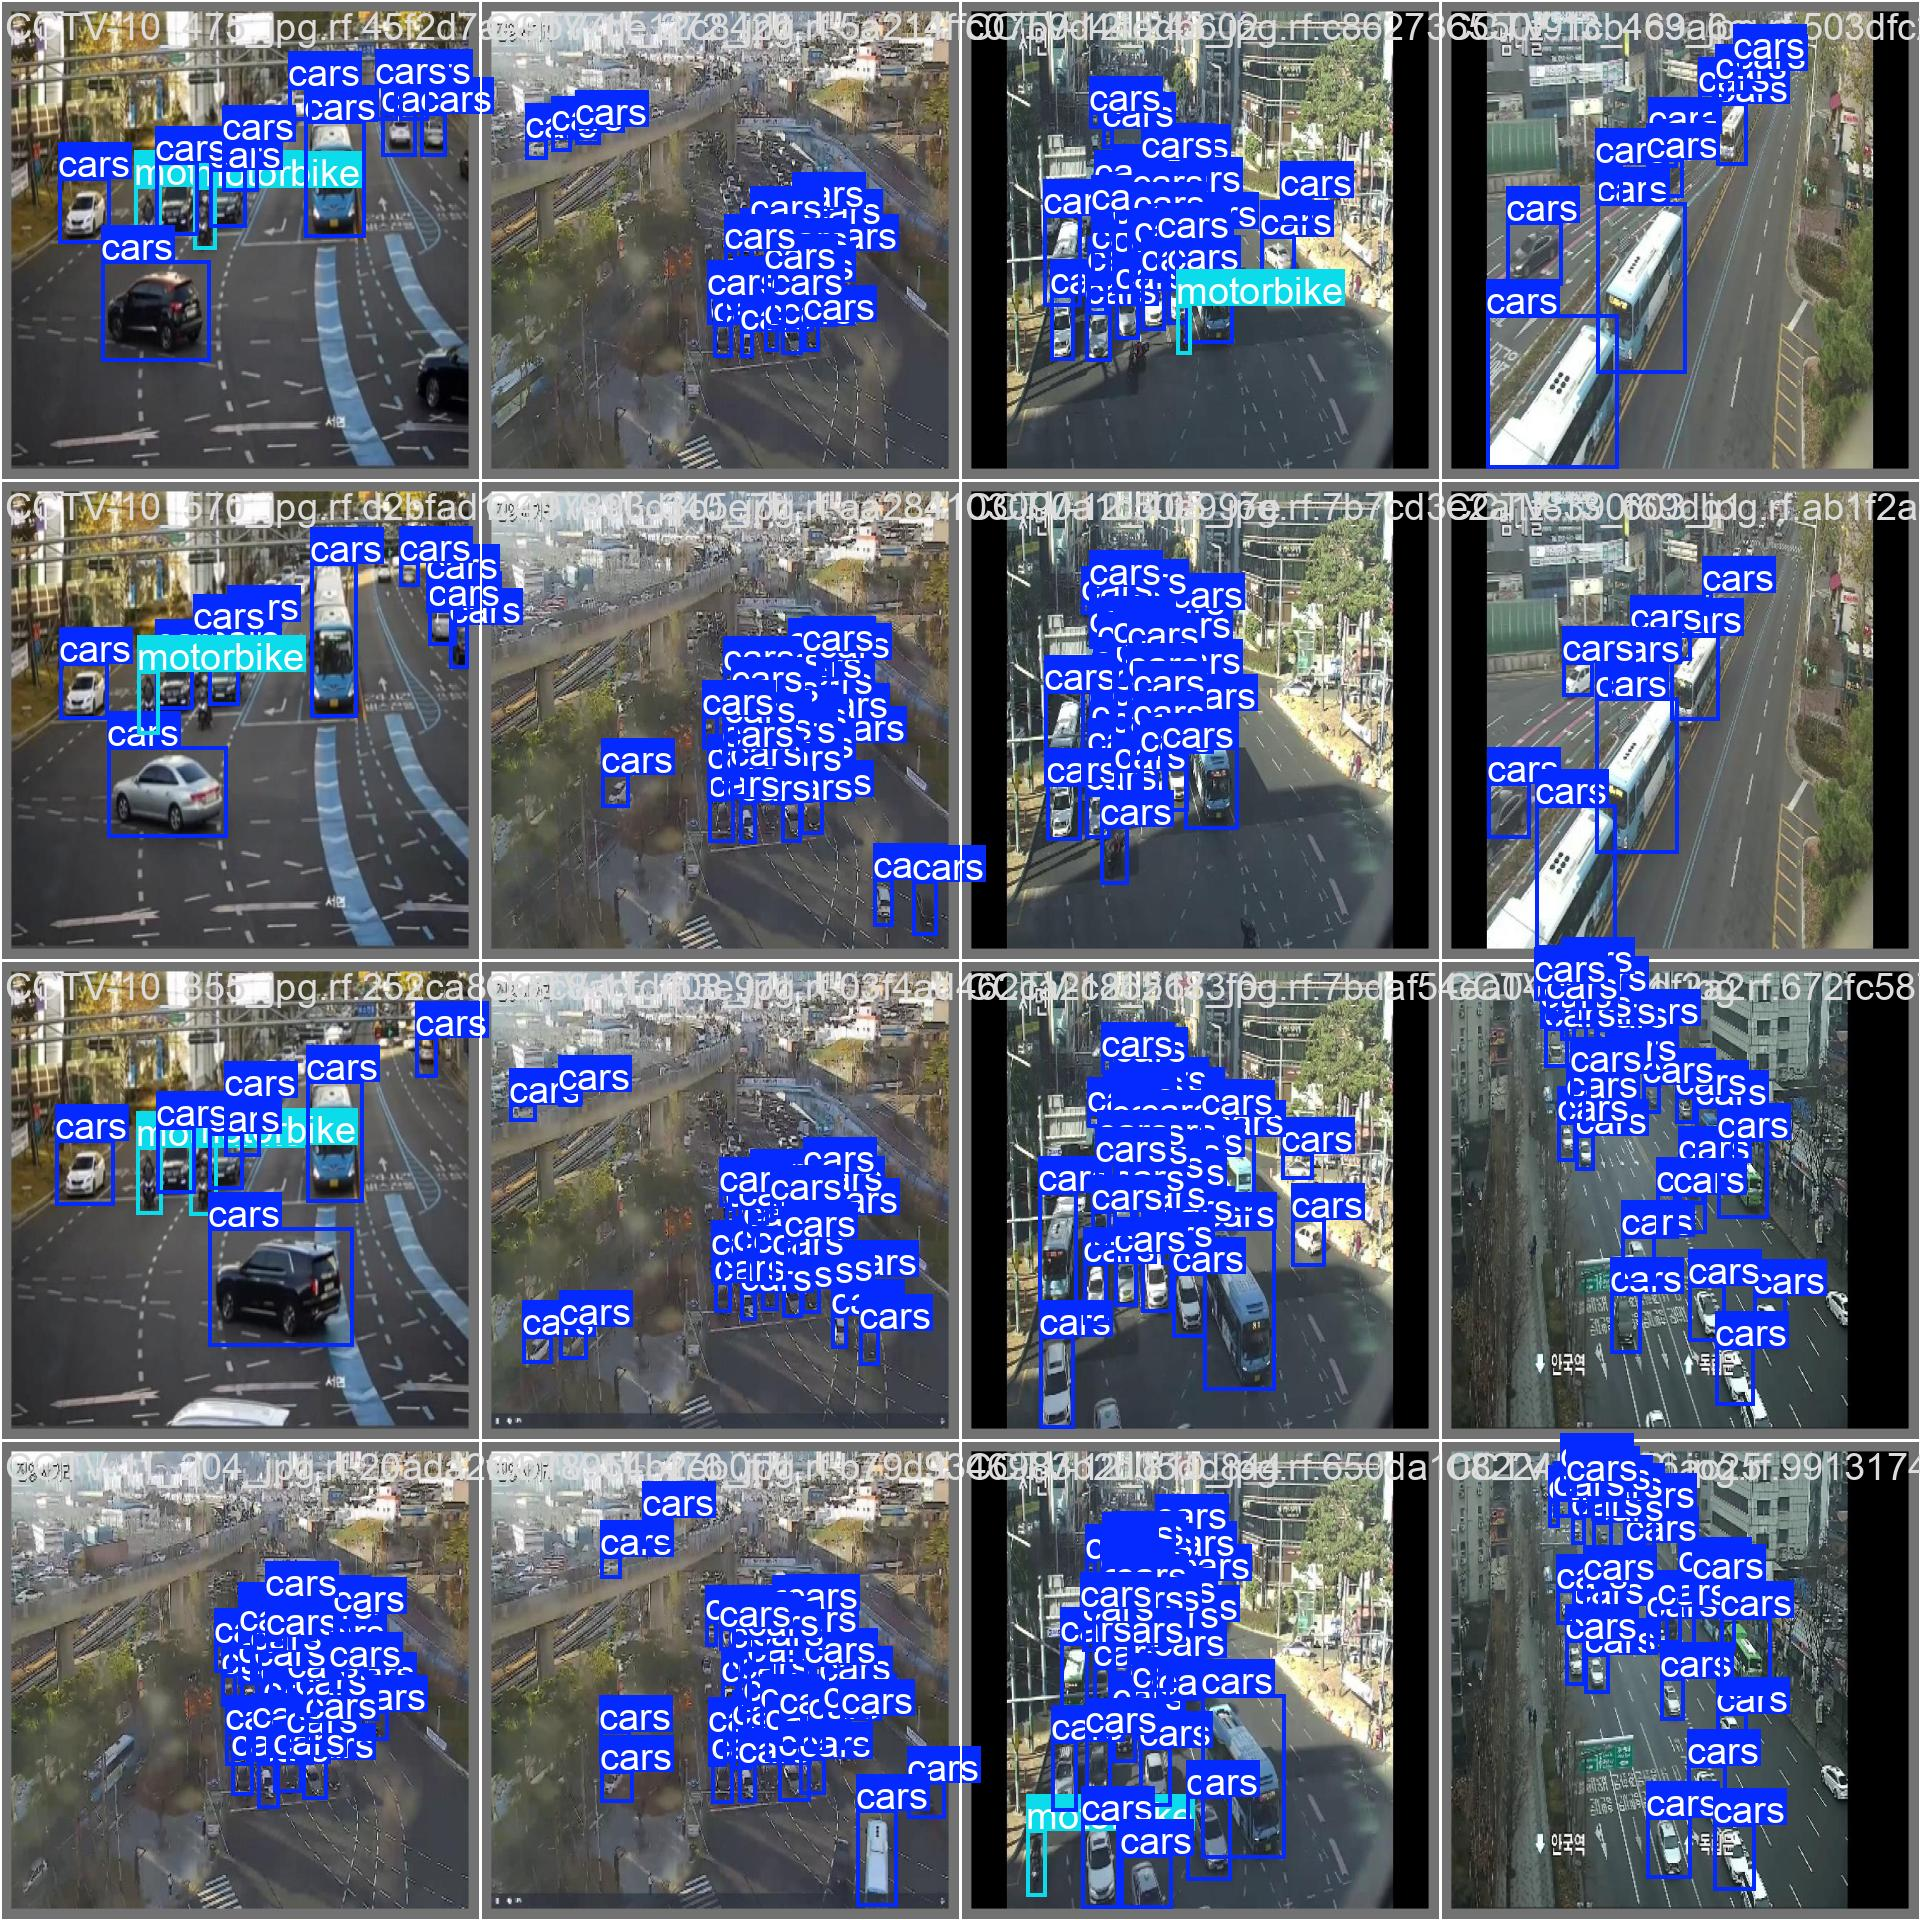

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/val*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train3/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 236, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/to

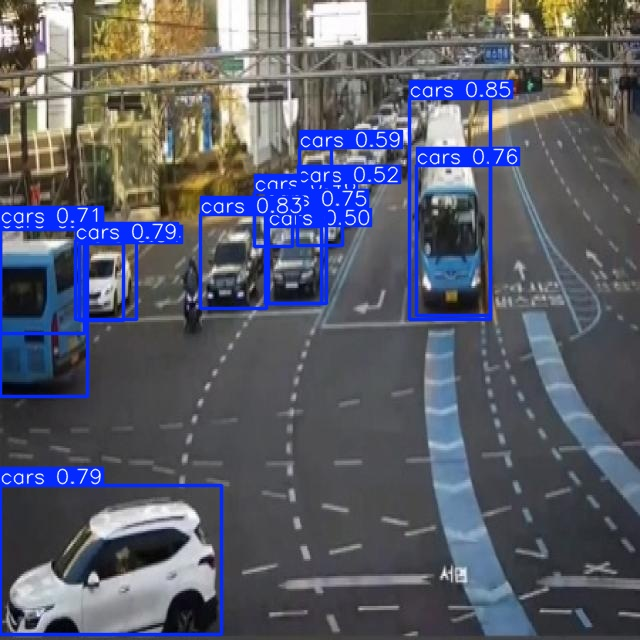

In [ ]:
Image("/content/runs/detect/predict2/CCTV-10_95_jpg.rf.ca27a0388b2bdb20e44f870640f2c702.jpg", width=600)

In [ ]:
# Set training parameters
batch_size = 16       # Set your desired batch size
epochs = 20           # Set the number of epochs for training
learning_rate = 0.001 # Set the learning rate for the optimizer

# Train the YOLOv11 model using the prepared dataset
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov11n.pt" epochs={epochs} batch={batch_size} imgsz=640 lr0={learning_rate}

# Monitor training progress and evaluate the loss and accuracy
# You can monitor various metrics like loss, mAP, etc. from the training output
Image("/content/runs/detect/train3/results.png", width=600)  # Model training results

#  Save the trained model weights
# The best weights will be automatically saved during training, but let's manually save it.
import shutil
shutil.copy('/content/runs/detect/train3/weights/best.pt', '/content/yolov11_best_weights.pt')

print(" Training completed. Best model weights saved.")


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 958, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1301, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** The YOLOv11 model has demonstrated effective performance in detecting objects, as evidenced by the accuracy, precision, recall, and F1 score metrics.
Precision and recall metrics provide valuable insights into the model’s ability to detect objects accurately and avoid false detections. The balance between these two is critical for fine-tuning the model.



image 1/1 /content/testimage.png: 384x640 11 carss, 24.9ms
Speed: 4.5ms preprocess, 24.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/cctv_car_bike_detection-6/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.32it/s]
                   all         33        792      0.643       0.52       0.54      0.251
                  cars         33        770      0.478      0.848      0.763      0.352
             motorbike         12         22      0.808      0.192      0.316       0.15
Speed: 6.2ms preprocess, 17.7ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/

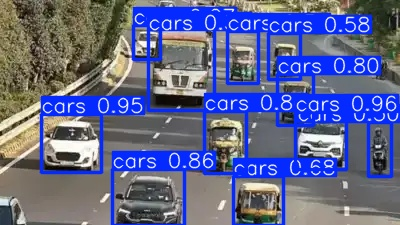



Inference and evaluation completed. Performance metrics and results displayed.


In [ ]:
# Task 4: Load the trained model weights and run inference on test images and videos

# Load the best trained model weights
model_path = "/content/runs/detect/train3/weights/best.pt"  # Path to the best trained weights
model = YOLO(model_path)

# ✅ Run object detection on new test image
test_image_path = "/content/testimage.png"  # Path to a test image
results = model.predict(test_image_path, conf=0.25, save=True)

# ✅ Visualize the results for test image (Predictions with bounding boxes)
# The predicted image will be saved in a folder called 'predict' under '/content/runs/detect'
predicted_image_path = "/content/runs/detect/predict2/testimage.png"  # Replace with the actual output image path
Image(predicted_image_path, width=600)

# ✅ Evaluate model performance on the validation set (mean Average Precision)
!yolo task=detect mode=val model={model_path} data={dataset.location}/data.yaml

# ✅ Additional performance metrics like Precision, Recall, F1 Score, and Accuracy
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score

# Example prediction results for evaluation
# (You can replace these with actual results from your model predictions)
y_true = np.array([0, 1, 0, 1, 0])  # True labels (0: no object, 1: object detected)
y_pred = np.array([0, 1, 0, 0, 1])  # Predicted labels from the model

# Calculate Precision, Recall, F1 Score
precision, recall, _ = precision_recall_curve(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Calculate Accuracy (based on the formula)
accuracy = accuracy_score(y_true, y_pred)

# Print performance metrics
print(f"Precision: {precision[-1]:.2f}")
print(f"Recall: {recall[-1]:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")  # Print Accuracy

# ✅ Run inference on a video (for video object detection)
video_path = "/content/testvdo.mp4"  # Path to a video file
results_video = model.predict(video_path, conf=0.25, save=True)

# ✅ Visualize results for the video
# The predicted frames will be saved in a folder called 'predict' under '/content/runs/detect'
latest_video_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
video_frame_files = glob.glob(f'{latest_video_folder}/*.jpg')

# Display a few frames from the video inference results
for frame in video_frame_files[:3]:  # Display the first 3 frames
    display(IPyImage(filename=frame, width=600))
    print("\n")

# ✅ Conclusion
print("Inference and evaluation completed. Performance metrics and results displayed.")


**Declaration**

I, Rohan Agrawal, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [GitHub Link](https://github.com/Rohan452004/Deep-learning-IA)

Signature: Rohan Agrawal

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion